# Introduction: Data Exploration

# Setup
Let us import the required modules.

In [1]:
import numpy as np
import os
import seaborn as sns
import src.utilities.data_split as ds
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## Load Data

In [2]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
y = y.astype(int)
X = X.astype(np.float32)
X = X/255.

In [4]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 784 columns):
 #    Column    Dtype  
---   ------    -----  
 0    pixel1    float32
 1    pixel2    float32
 2    pixel3    float32
 3    pixel4    float32
 4    pixel5    float32
 5    pixel6    float32
 6    pixel7    float32
 7    pixel8    float32
 8    pixel9    float32
 9    pixel10   float32
 10   pixel11   float32
 11   pixel12   float32
 12   pixel13   float32
 13   pixel14   float32
 14   pixel15   float32
 15   pixel16   float32
 16   pixel17   float32
 17   pixel18   float32
 18   pixel19   float32
 19   pixel20   float32
 20   pixel21   float32
 21   pixel22   float32
 22   pixel23   float32
 23   pixel24   float32
 24   pixel25   float32
 25   pixel26   float32
 26   pixel27   float32
 27   pixel28   float32
 28   pixel29   float32
 29   pixel30   float32
 30   pixel31   float32
 31   pixel32   float32
 32   pixel33   float32
 33   pixel34   float32
 34   pixel35   float32
 3

In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

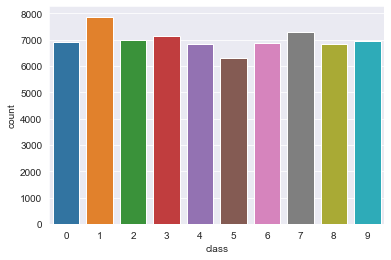

In [6]:
sns.countplot(x=y)

## Visualization

In [7]:
def plot_data(rows=3, cols=5):
    to_plot = X[:rows*cols].to_numpy().reshape(rows*cols,28,28)
    fig, axs = plt.subplots(rows, cols)
    k = 0

    for i in range(rows):
        for j in range(cols):
            axs[i,j].imshow(to_plot[k], cmap=plt.get_cmap('gray'))
            axs[i,j].axis('off')
            k += 1

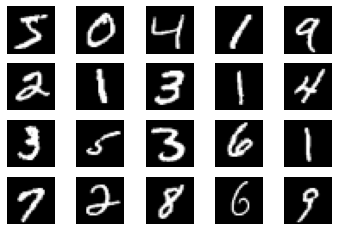

In [8]:
plot_data(4,5)

# Pixels with 1 Unique value (useless pixels, 0 columns)

In [9]:
one_val_vars = [var for var in X.columns if X[var].dtypes != 'O' and len(X[var].unique()) == 1]

print("The total number of useless feature is: ", len(one_val_vars))

for f in one_val_vars:
    print (f, X.loc[:,f].unique())

The total number of useless feature is:  65
pixel1 [0.]
pixel2 [0.]
pixel3 [0.]
pixel4 [0.]
pixel5 [0.]
pixel6 [0.]
pixel7 [0.]
pixel8 [0.]
pixel9 [0.]
pixel10 [0.]
pixel11 [0.]
pixel12 [0.]
pixel17 [0.]
pixel18 [0.]
pixel19 [0.]
pixel20 [0.]
pixel21 [0.]
pixel22 [0.]
pixel23 [0.]
pixel24 [0.]
pixel25 [0.]
pixel26 [0.]
pixel27 [0.]
pixel28 [0.]
pixel29 [0.]
pixel30 [0.]
pixel31 [0.]
pixel32 [0.]
pixel53 [0.]
pixel54 [0.]
pixel55 [0.]
pixel56 [0.]
pixel57 [0.]
pixel58 [0.]
pixel83 [0.]
pixel84 [0.]
pixel85 [0.]
pixel86 [0.]
pixel112 [0.]
pixel113 [0.]
pixel141 [0.]
pixel169 [0.]
pixel477 [0.]
pixel561 [0.]
pixel645 [0.]
pixel672 [0.]
pixel673 [0.]
pixel674 [0.]
pixel700 [0.]
pixel701 [0.]
pixel702 [0.]
pixel728 [0.]
pixel729 [0.]
pixel730 [0.]
pixel731 [0.]
pixel755 [0.]
pixel756 [0.]
pixel757 [0.]
pixel758 [0.]
pixel759 [0.]
pixel760 [0.]
pixel781 [0.]
pixel782 [0.]
pixel783 [0.]
pixel784 [0.]


## Train Test split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=28)
data_split = ds.TrainTestSplit(x_train, x_test, y_train, y_test)

In [12]:
data_split.x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 67215 to 42241
Data columns (total 784 columns):
 #    Column    Dtype  
---   ------    -----  
 0    pixel1    float32
 1    pixel2    float32
 2    pixel3    float32
 3    pixel4    float32
 4    pixel5    float32
 5    pixel6    float32
 6    pixel7    float32
 7    pixel8    float32
 8    pixel9    float32
 9    pixel10   float32
 10   pixel11   float32
 11   pixel12   float32
 12   pixel13   float32
 13   pixel14   float32
 14   pixel15   float32
 15   pixel16   float32
 16   pixel17   float32
 17   pixel18   float32
 18   pixel19   float32
 19   pixel20   float32
 20   pixel21   float32
 21   pixel22   float32
 22   pixel23   float32
 23   pixel24   float32
 24   pixel25   float32
 25   pixel26   float32
 26   pixel27   float32
 27   pixel28   float32
 28   pixel29   float32
 29   pixel30   float32
 30   pixel31   float32
 31   pixel32   float32
 32   pixel33   float32
 33   pixel34   float32
 34   pixel35   float3

In [13]:
data_split.y_train.shape

(60000,)

In [14]:
data_split.x_train.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
67215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data_split.y_train

67215    3
63433    1
28405    1
34388    1
30889    2
        ..
40195    8
7200     9
62742    9
69625    4
42241    8
Name: class, Length: 60000, dtype: int64

## Save datasets

In [16]:
if not os.path.exists("../data"):
    os.mkdir("../data/")

data_split.to_csv(dir_path="../data")